Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). On JupyterLab, you may want to hit the "Validate" button as well.

Caution: do not mess with the notebook's metadata; do not change a pre-existing cell's type; do not copy pre-existing cells (add new ones with the + button instead). This will break autograding; you will get a 0; you are warned.

<table style="width: 100%; border: none;" cellspacing="0" cellpadding="0" border="0">
  <tr>
    <td><img src="https://www.planetegrandesecoles.com/wp-content/uploads/2021/07/Identite%CC%81-visuelle-Plane%CC%80te-BAC-8-600x398.png" style="float: left; width: 100%" />
</td>
    <td><h1 style="text-align: center; vertical-align: middle;"><a href="https://moodle.polytechnique.fr/course/view.php?id=15585">[CSE204-2022] - Introduction to Machine Learning</a></h1>
</td>
  </tr>
</table>

---

# Lab Session 1: Jupyter Notebooks, Pandas, Sklearn basics

# Introduction

Welcome to the 1st [CSE 204](https://moodle.polytechnique.fr/course/view.php?id=15585) lab session: *Introduction to Machine Learning*.

This lab session assumes you are familiar with the Python programming language.
Check [CSE 101](https://moodle.polytechnique.fr/course/view.php?id=12766), [CSE 102](https://moodle.polytechnique.fr/course/view.php?id=12833) and [CSE 103](https://moodle.polytechnique.fr/course/view.php?id=12834) if you need to refresh your knowledge.

Note that the 1st year courses used scripting tools (e.g. Spyder) and relied on relatively "low-level" abstractions (lists, numpy arrays, etc.) and manipulation techniques (e.g. `for` loops). While the knowledge of these concepts and tools is mandatory for this course and your future use of Python, we will concentrate in this course on Jupyter Notebooks (more on these later) and "high-level" abstractions (e.g. `pandas`, scikit-learn, plotting libraries) that are very commonly used in Machine Learning projects.

Additional documentation can be found there:
- [Python 3 documentation](https://docs.python.org/3/)
- [The Python Tutorial](https://docs.python.org/3/tutorial/index.html)
- [The Python Standard Library](https://docs.python.org/3/library/index.html)
- [The Python Language Reference](https://docs.python.org/3/reference/index.html)

### Jupyter Notebooks

The document you are reading is a [Jupyter Notebook](https://jupyter.org/).

The Jupyter Notebook (formerly IPython Notebooks) is a web-based interactive web application for creating documents that contain live code, equations, visualizations and narrative text. While notebooks represent a good way to build a tutorial or a report, you will still need to rely on more common, scripting IDEs like Spyder or PyCharm, when working on a "project" (e.g. by organizing functions in modules to industrialize a data science product).

The notebook consists of a sequence of cells. A cell is a multiline text input field, and **its contents can be executed** by using `Shift+Enter`, or by clicking either the `Play` button on the toolbar, or Cell, Run in the menu bar. The execution behavior of a cell is determined by the cell’s type. There are three types of cells: *code cells*, *markdown cells*, and *raw cells*. Every cell starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially).

#### Code cells

A code cell allows you to edit and write new code, with full syntax highlighting and tab completion. The programming language used here is Python.

When a code cell is executed, code that it contains is sent to the kernel associated with the notebook. The results that are returned from this computation are then displayed in the notebook as the cell’s output. The output is not limited to text, with many other possible forms of output are also possible, including figures and HTML tables.

**Tips**:
- press the `Tab` key to use auto completion in code cells
- press `Shift+Tab` to display the documentation of the current object (the one on witch the cursor is)

See e.g. https://miykael.github.io/nipype_tutorial/notebooks/introduction_jupyter-notebook.html

#### Markdown cells

You can document the computational process in a literate way, alternating descriptive text with code, using rich text. In IPython this is accomplished by marking up text with the Markdown language. The corresponding cells are called Markdown cells. The Markdown language provides a simple way to perform this text markup, that is, to specify which parts of the text should be emphasized (italics), bold, form lists, etc. See [this cheatsheet](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf).

Markdown cells will also render $\LaTeX$ code escaped with \\$\LaTeX\\$.

For more information about Jupyter Notebooks, read its [official documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#structure-of-a-notebook-document).

#### Save your work!

Don't forget to regularly save your work! On JupyterLab, there is some autosaving but hitting `Ctrl+S` will ease your mind.

## Objectives

What we will practice today:
- Pandas basics
- Making an exploratory analysis on an real dataset
- Making a first predictive model for this dataset

## Pandas Basics

[Pandas](http://pandas.pydata.org/) is a popular data analysis toolkit for Python.

We will use it to explore data with heterogeneous types and/or missing values.

Additional documentation can be found there:
- https://pandas.pydata.org/docs/getting_started/index.html
- http://pandas.pydata.org/pandas-docs/stable/
- https://jakevdp.github.io/PythonDataScienceHandbook/
- http://www.jdhp.org/docs/notebook/python_pandas_en.html

### Import directives

To begin with, let's import the Pandas library as the *pd* alias. Select the following code cell and execute it with the `Shift + Enter` shortcut key.

We also import:
- Numpy to generate arrays
- Seaborn to make plots
- Sklearn to learn data

The `%matplotlib inline` line is a "magic" command that tells Jupyter Notebook to display figures within the document.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

### Make DataFrames (2D data)

Let's make a *DataFrame* now. DataFrame is the name given to 2D arrays in Pandas. We will assign this DataFrame to the `df` variable and display it (with the `df` line at the end of the cell).

When the data carries a meaning, i.e. comes from a real data source, e.g. the `titanic` dataset, always use explicit names such as `df_titanic`. See [PEP8](https://www.python.org/dev/peps/pep-0008/), a Python code style guide, for details.

In [2]:
data = [[1, 2, 3], [4, 5, 6]]
df = pd.DataFrame(data)
df

,0,1,2
0,1,2,3
1,4,5,6


The previous command has made a DataFrame with automatic *indices* (rows index) and *columns* (columns label).

To make a DataFrame with a custom indix (possibly multiple indices although not covered in this course) and custom column names, use:

In [3]:
data = [[1, 2, 3], [4, 5, 6]]
index = [10, 20]
columns = ['A', 'B', 'C']

df = pd.DataFrame(data=data, index=index, columns=columns)
df

,A,B,C
10,1,2,3
20,4,5,6


A Python dictionary can be used to define data; its keys define its **columns'** labels.

In [4]:
data_dict = {'A': 'foo',
             'B': [10, 20, 30],
             'C': 3.14}
df = pd.DataFrame(data_dict, index=[10, 20, 30])
df

,A,B,C
10,foo,10,3.14
20,foo,20,3.14
30,foo,30,3.14


#### Get information about a dataframe

Its (row) index (possibly indices):

In [5]:
df.index

Int64Index([10, 20, 30], dtype='int64')

Its columns' labels (also an index!):

In [6]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

Its shape (i.e. number of rows and number of columns):

In [7]:
df.shape

(3, 3)

The number of lines in `df` is:

In [8]:
df.shape[0]

3

The number of columns in `df` is:

In [9]:
df.shape[1]

3

The data type of each column:

In [10]:
df.dtypes

A     object
B      int64
C    float64
dtype: object

Additional information about columns:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 10 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      object 
 1   B       3 non-null      int64  
 2   C       3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 96.0+ bytes


In [12]:
df.describe()

,B,C
count,3.0,3.00
mean,20.0,3.14
std,10.0,0.00
min,10.0,3.14
25%,15.0,3.14
50%,20.0,3.14
75%,25.0,3.14
max,30.0,3.14


### Select a single column

Here are 3 equivalent syntaxes to get the column "C":

In [13]:
df.C

10    3.14
20    3.14
30    3.14
Name: C, dtype: float64

In [14]:
df["C"]

10    3.14
20    3.14
30    3.14
Name: C, dtype: float64

In [15]:
df.loc[:, "C"]

10    3.14
20    3.14
30    3.14
Name: C, dtype: float64

Note that a "column" corresponds to a `pandas.Series` object:

In [16]:
type(df["C"])

pandas.core.series.Series

Selecting multiple columns, or a list containing at least one column, will output a `pandas.DataFrame`. This is subtle but may be the cause of subsequent errors.

In [17]:
df[["C"]]

,C
10,3.14
20,3.14
30,3.14


In [18]:
type(df[["C"]])

pandas.core.frame.DataFrame

### Select multiple columns

Here are 2 equivalent syntaxes to get both columns "A" and "B":

In [19]:
df[['A', 'B']]

,A,B
10,foo,10
20,foo,20
30,foo,30


In [20]:
df.loc[:, ['A', 'B']]

,A,B
10,foo,10
20,foo,20
30,foo,30


### Select a single row

In [21]:
df.loc[10]

A     foo
B      10
C    3.14
Name: 10, dtype: object

In [22]:
df.loc[10, :]

A     foo
B      10
C    3.14
Name: 10, dtype: object

Note that again, the result being a "vector", the output is of type `pandas.Series`:

In [23]:
type(df.loc[10, :])

pandas.core.series.Series

### Select multiple rows

In [24]:
df.loc[[10, 20], :]

,A,B,C
10,foo,10,3.14
20,foo,20,3.14


### Select rows based on values

In [25]:
df.B < 30.  # this is a Series

10     True
20     True
30    False
Name: B, dtype: bool

In [26]:
df.loc[df.B < 30.]  # this is a DataFrame

,A,B,C
10,foo,10,3.14
20,foo,20,3.14


In [27]:
df.loc[(df.B < 20) | (df.B >= 30)]

,A,B,C
10,foo,10,3.14
30,foo,30,3.14


In [28]:
df.loc[(df.B >= 20) & (df.B < 30)]

,A,B,C
20,foo,20,3.14


### Select rows and columns

In [29]:
df.loc[(df.B < 20) | (df.B >= 30), 'C']  # this is a Series

10    3.14
30    3.14
Name: C, dtype: float64

In [30]:
df.loc[(df.B < 20) | (df.B >= 30), ['A', 'B']]  # this is a DataFrame

,A,B
10,foo,10
30,foo,30


### Select columns based on a condition

Which column of the 10th line (starting from the Oth) takes value `'foo'`?

In [31]:
df.loc[10] == 'foo'

A     True
B    False
C    False
Name: 10, dtype: bool

Of those, which value(s) are `True`?

**The 0th**

In [32]:
np.where(df.loc[10] == 'foo')

(array([0]),)

To which column name (or `Index`) does column 0 correspond?

In [33]:
df.columns[np.where(df.loc[10] == 'foo')]

Index(['A'], dtype='object')

In [34]:
df.columns[np.where(df.loc[10] == 'foo')].to_list()

['A']

### Apply a function to selected columns' values

In [35]:
df.B *= 2.
df

,A,B,C
10,foo,20.0,3.14
20,foo,40.0,3.14
30,foo,60.0,3.14


In [36]:
df.B = pow(df.B, 2)
df

,A,B,C
10,foo,400.0,3.14
20,foo,1600.0,3.14
30,foo,3600.0,3.14


### Apply a function to selected rows' values

In [37]:
df.loc[df.B < 500., 'A'] = -1
df

,A,B,C
10,-1,400.0,3.14
20,foo,1600.0,3.14
30,foo,3600.0,3.14


In [38]:
df.loc[(df.B < 500.) | (df.B > 2000), 'C'] = 0
df

,A,B,C
10,-1,400.0,0.00
20,foo,1600.0,3.14
30,foo,3600.0,0.00


### Handling missing data

Missing data are represented by a *NaN* ("Not a Number").

In [39]:
# equivalently, use np.nan
data = [[3, 2, 3],
        [float("nan"), 4, 4],
        [5, float("nan"), 5],
        [float("nan"), 3, 6],
        [7, 1, 1]]
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df

,A,B,C
0,3.0,2.0,3
1,NaN,4.0,4
2,5.0,NaN,5
3,NaN,3.0,6
4,7.0,1.0,1


To obtain the boolean mask where values are NaN, type:

In [40]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,False


To drop any rows that have missing data:

In [41]:
df.dropna()

,A,B,C
0,3.0,2.0,3
4,7.0,1.0,1


Note: this does not replace df (as suggested by the fact that a DataFrame is printed: something is returned!).

In [42]:
df

,A,B,C
0,3.0,2.0,3
1,NaN,4.0,4
2,5.0,NaN,5
3,NaN,3.0,6
4,7.0,1.0,1


If you wish to overwrite `df`, you may reassign (`df = ...`) or use `inplace=True` (common to lots of `pandas`' methods).

To fill missing data with a chosen value (e.g. 999):

In [43]:
df.fillna(value=999)  # Again, this returns a new DataFrame

,A,B,C
0,3.0,2.0,3
1,999.0,4.0,4
2,5.0,999.0,5
3,999.0,3.0,6
4,7.0,1.0,1


To count the number of NaN values in a given column:

In [44]:
df.isnull().sum()

A    2
B    1
C    0
dtype: int64

The `axis` keyword (common to lots of `pandas`' methods) allows to do the summation on each line rather than by column:

In [45]:
df.isnull().sum(axis=1)

0    0
1    1
2    1
3    1
4    0
dtype: int64

### Exercice 1

In [46]:
df = pd.DataFrame([[i + j * 10 for i in range(10)] for j in range(20)],
                  columns=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])
df

,A,B,C,D,E,F,G,H,I,J
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49
5,50,51,52,53,54,55,56,57,58,59
6,60,61,62,63,64,65,66,67,68,69
7,70,71,72,73,74,75,76,77,78,79
8,80,81,82,83,84,85,86,87,88,89
9,90,91,92,93,94,95,96,97,98,99


Considering the dataframe `df` created in the previous cell:
- Write the code to extract the column 'C' and assign this subarray to a variable `df2` **of type DataFrame**.

In [47]:
# YOUR CODE HERE
df2=df[["C"]]
df2

,C
0,2
1,12
2,22
3,32
4,42
5,52
6,62
7,72
8,82
9,92


- Write the code to extract the column 'A' and 'F' and assign this sub-`DataFrame` to a variable `df3`.

In [48]:
# YOUR CODE HERE
df3=df[['A','F']]
df3

,A,F
0,0,5
1,10,15
2,20,25
3,30,35
4,40,45
5,50,55
6,60,65
7,70,75
8,80,85
9,90,95


- Write the code to extract lines where the value in column 'D' is greater than 100 and assign this sub-`DataFrame` to a variable `df4`.

In [49]:
# YOUR CODE HERE
df4=df.loc[df.D>100]
df4

,A,B,C,D,E,F,G,H,I,J
10,100,101,102,103,104,105,106,107,108,109
11,110,111,112,113,114,115,116,117,118,119
12,120,121,122,123,124,125,126,127,128,129
13,130,131,132,133,134,135,136,137,138,139
14,140,141,142,143,144,145,146,147,148,149
15,150,151,152,153,154,155,156,157,158,159
16,160,161,162,163,164,165,166,167,168,169
17,170,171,172,173,174,175,176,177,178,179
18,180,181,182,183,184,185,186,187,188,189
19,190,191,192,193,194,195,196,197,198,199


- Write the code to extract lines where the value in column 'D' is greater than 100 or less than 40 and assign this sub-`DataFrame` to a variable `df5`.

In [50]:
# YOUR CODE HERE
df5=df.loc[(df.D>100) | (df.D<40)]
df5

,A,B,C,D,E,F,G,H,I,J
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
10,100,101,102,103,104,105,106,107,108,109
11,110,111,112,113,114,115,116,117,118,119
12,120,121,122,123,124,125,126,127,128,129
13,130,131,132,133,134,135,136,137,138,139
14,140,141,142,143,144,145,146,147,148,149
15,150,151,152,153,154,155,156,157,158,159


- Write the code to extract lines where the value in column 'D' is less than 100 and greater than 40 and assign this sub-`DataFrame` to a variable `df6`.

In [51]:
# YOUR CODE HERE
df6=df.loc[(df.D<100) & (df.D>40)]
df6

,A,B,C,D,E,F,G,H,I,J
4,40,41,42,43,44,45,46,47,48,49
5,50,51,52,53,54,55,56,57,58,59
6,60,61,62,63,64,65,66,67,68,69
7,70,71,72,73,74,75,76,77,78,79
8,80,81,82,83,84,85,86,87,88,89
9,90,91,92,93,94,95,96,97,98,99


- Write the code to extract the values of columns 'D' and 'E' of lines where column 'B' is greater than 100 or less than 40 and assign this sub-`DataFrame` to a variable `df7`.

In [52]:
# YOUR CODE HERE
df7 = df.loc[(df.B>100) | (df.B<40), ['B','E']]
df7

,B,E
0,1,4
1,11,14
2,21,24
3,31,34
10,101,104
11,111,114
12,121,124
13,131,134
14,141,144
15,151,154


## Exploratory analysis of the Titanic dataset

### Problem description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab session, you will complete the analysis of what sorts of people were likely to survive and you will apply machine learning methods to predict which passengers survived the tragedy.

([Description from Kaggle](https://www.kaggle.com/c/titanic))

### Load data

We start by acquiring the dataset into the `df` Pandas DataFrames.

In [53]:
titanic = pd.read_csv("~/shareddata/CSE204/titanic/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Variables description

Here are the *features* available in the dataset:

In [54]:
for column in titanic.columns:
    print(column)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


- *Survived*: survived (1) or died (0)
- *Pclass*: passenger's class
- *Name*: passenger's name
- *Sex*: passenger's sex
- *Age*: passenger's age
- *SibSp*: number of siblings/spouses aboard
- *Parch*: number of parents/children aboard
- *Ticket*: ticket number
- *Fare*: fare
- *Cabin*: cabin
- *Embarked*: port of embarkation
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton


([Description from Kaggle](https://www.kaggle.com/c/titanic/data))

### Exercise 2

- List *categorical* features in the Titanic dataset and store it in `titanic_categorical` (of type `list`).

**Hint**: the types of all features can be retrieved with `titanic.dtypes`. Which one(s) are **not** *numerical*?

**Warning**: a systematic approach is expected, DO NOT simply copy/paste column names from above.

In [55]:
# YOUR CODE HERE
titanic_categorical=titanic.columns[np.where(titanic.dtypes == "object")].to_list()

- List *numerical* features and store it in `titanic_numerical`. **Hint**: if they're numerical, they're not *categorical*.

In [56]:
# YOUR CODE HERE
titanic_numerical=titanic.columns[np.where(titanic.dtypes != "object")].to_list()
titanic_numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

- Which features contain blank, null or empty values? Store a list of them in `titanic_features_blank`.

**Warning**: a list of feature names is expected.

In [57]:
# YOUR CODE HERE
titanic_features_blank=titanic.columns[np.where(titanic.isnull().sum() !=0)].to_list()
titanic_features_blank

['Age', 'Cabin', 'Embarked']

- We want to complete the analysis of what sorts of people were likely to survive, i.e. to predict for a new passenger whether he/she will (or would have...) survive(d) or not. What kind of machine learning problem is it?
- A supervised / unsupervised problem?
- A classification / regression / clustering / reinforcement learning problem?
- **Why?**

Sample size: 891 > 50 but less than 100K

Since we are predicting a category and our data is labeled, we are in the presence of a supervised problem. In particular, it is a classification problem (from the lecture notes).

### Display a quick summary of the dataset

In [58]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exercise 3

- What is the age of the oldest passenger (or crew)? Store it in `age_oldest_on_titanic`.

**Warning**: use a systematic approach. DO NOT simply copy/paste from the table above. A `float` is expected.

In [59]:
# YOUR CODE HERE
age_oldest_on_titanic=titanic.Age.max()
age_oldest_on_titanic

80.0

- What is the average fare ? Store it in `average_fare_on_titanic`.

**Warning**: use a systematic approach. DO NOT simply copy/paste from the table above. A `float` is expected.

In [60]:
# YOUR CODE HERE
average_fare_on_titanic=titanic.Fare.mean()
average_fare_on_titanic

32.204207968574636

- What are the fare quartiles?

**Warning**: use a systematic approach. DO NOT simply copy/paste from the table above. A `Series` is expected.

In [61]:
# YOUR CODE HERE
fare_quantiles_titanic=titanic.Fare.quantile([0.25,0.5,0.75])
fare_quantiles_titanic

0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64

### Explore correlations between the numerical features and survival of passengers

Let us start by understanding correlations between numerical features and the label we want to predict (Survived).

#### Correlation survival vs age

Bins: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


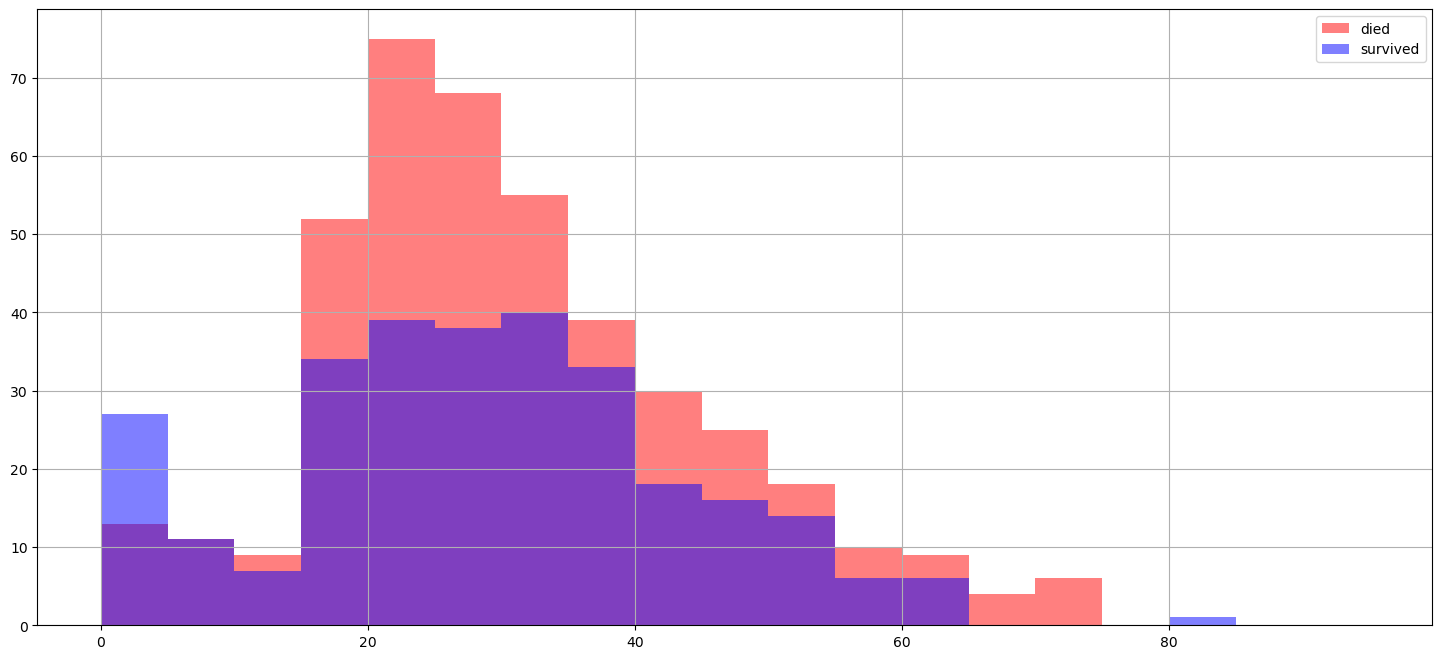

In [62]:
bins = np.arange(0, 100, 5)  # this controls the width of the age categories
print("Bins:", bins)

ax = titanic.loc[titanic.Survived == 0, "Age"].hist(  # we select dead people's rows and use hist(ogram)
    bins=bins, color="red", alpha=0.5, label="died", figsize=(18, 8))  # let's plot them in red
titanic.loc[titanic.Survived == 1, "Age"].hist(  # we select surviving people's rows and use hist(ogram)
    bins=bins, color="blue", ax=ax, alpha=0.5, label="survived")  # let's plot them in blue
ax.legend();  # let's add a legend

Don't forget to check missing values as it could bias the plot above!

In [63]:
titanic.loc[(titanic.Age.isnull()) & (titanic.Survived == 0)].shape[0]

125

In [64]:
titanic.loc[(titanic.Age.isnull()) & (titanic.Survived == 1)].shape[0]

52

### Exercise 4

What useful qualitative observation can you extract from the previous plot?

We can observe that most of the people who died are between 18 and 35. We can also observe it is also the age range in which most survivors fall into. However, the high mortality rate can be explained from the fact that young children are given priority for lifeboats and older passangers were the most likely to have bought first class tickets, hence making it easier for them to escape the sunken boat. 

### Exercise 5

Plot correlation between Fare and Survival. Use the code from the previous cell as a starting point.

Bins: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


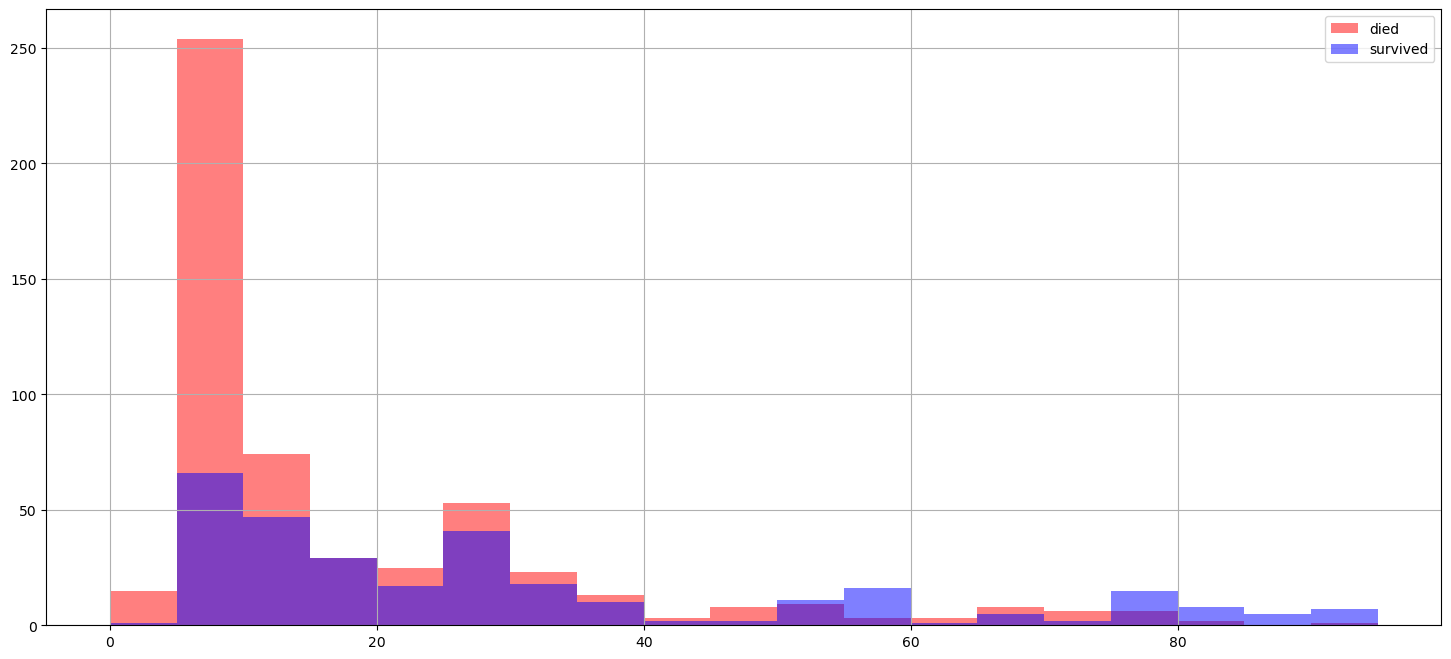

In [65]:
# YOUR CODE HERE
bins = np.arange(0, 100, 5)
print("Bins:", bins)

ax = titanic.loc[titanic.Survived == 0, "Fare"].hist(bins=bins, color="red", alpha=0.5, label="died", figsize=(18, 8))
titanic.loc[titanic.Survived == 1, "Fare"].hist(bins=bins, color="blue", ax=ax, alpha=0.5, label="survived")
ax.legend();

What useful observation can you extract from the previous plot?

Most of the people who died had cheap tickets, which gives us useful information of the category of people who survived. 

### Explore correlations between the categorical features and survival of passengers

#### Correlation survival vs class

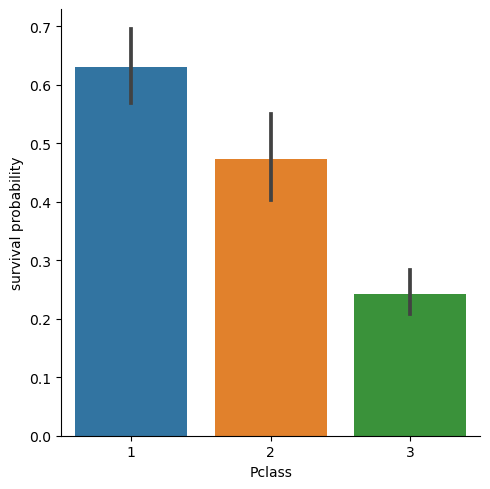

In [66]:
g = sns.catplot(y="Survived", x="Pclass", kind="bar", data=titanic)
g.set_ylabels("survival probability");

Survival probability is simply the ratio of surviving passengers in each class.

### Exercise 6

What useful observation can you extract from the previous plot?

We can see that the higher the class, the higher the probability of survival, which endorses our previous claim from the question before. Passengers who had 1st class tickets had the highest probability of survival (approx 0.6), passengers in 2nd class had approx. 0.5 probablity of survival and 3rd class passengers had the lowest one (approx 0.25). 

Plot correlation between
* Sex and Survival
* SibSp and Survival
* Parch and Survival
* Embarked and Survival

Use the code from the previous cell as a starting point.

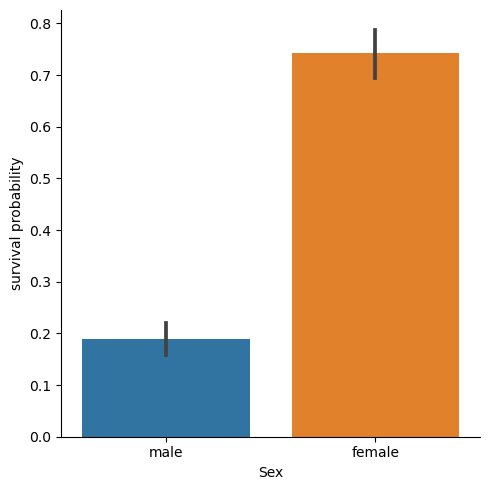

In [67]:
# YOUR CODE HERE
Sex_Survival=sns.catplot(y="Survived", x="Sex", kind="bar", data=titanic)
Sex_Survival.set_ylabels("survival probability");


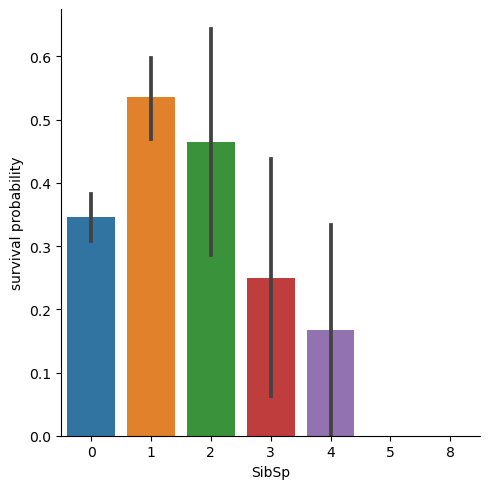

In [68]:
SibSP_Survival=sns.catplot(y="Survived", x="SibSp", kind="bar", data=titanic)
SibSP_Survival.set_ylabels("survival probability");

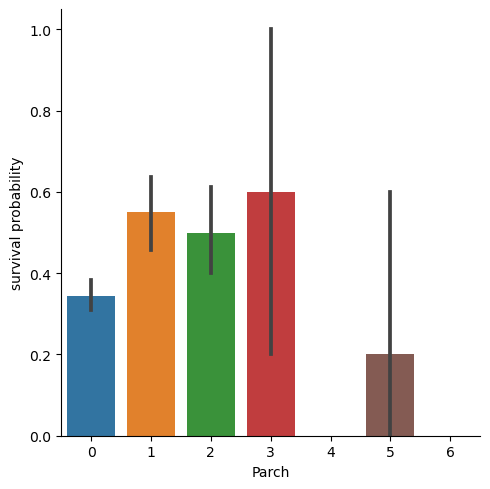

In [69]:
Parch_Survival= sns.catplot(y="Survived", x="Parch", kind="bar", data=titanic)
Parch_Survival.set_ylabels("survival probability");

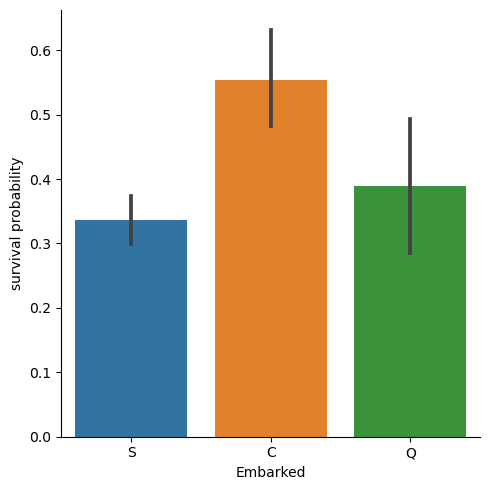

In [70]:
Embarked_Survival= sns.catplot(y="Survived", x="Embarked", kind="bar", data=titanic)
Embarked_Survival.set_ylabels("survival probability");

What useful observation can you extract from these plots ?

We can see that the probability of surviving is a lot higher for women than for men and that the higher the class, the more chances of surviving. This also explains why people with a lot of family on board have a lower chance of surviving, since they probably could not afford to buy a first class ticket for the whole family. The probablility of survival also depends on the embarking location, a parameter that in itself should not correlate with the chance of survival, but is a good indicator of the social class of people who embarked from there.

### Exercise 7

The following code computes the survival rate of women in the first class, i.e. an estimate of $P(\text{Survived} = 1 | \text{Sex}=\text{female}, \text{Pclass}=1)$.

Note how we're making good use of the (frustrating) first exercises.

In [71]:
p_survived_1_given_female_1 = titanic.loc[(titanic.Sex == "female") & (titanic.Pclass == 1), "Survived"].mean()
p_survived_1_given_female_1

0.9680851063829787

Compute the survival rate corresponding to:

- $P(\text{Survived} = 1 | \text{Sex}=\text{female}, \text{Pclass}=2)$ and store it in `p_survived_1_given_female_2`

In [72]:
# YOUR CODE HERE
p_survived_1_given_female_2 = titanic.loc[(titanic.Sex == "female") & (titanic.Pclass == 2), "Survived"].mean()
p_survived_1_given_female_2

0.9210526315789473

- $P(\text{Survived} = 1 | \text{Sex}=\text{female}, \text{Pclass}=3)$ and store it in `p_survived_1_given_female_3`

In [73]:
# YOUR CODE HERE
p_survived_1_given_female_3 = titanic.loc[(titanic.Sex == "female") & (titanic.Pclass == 3), "Survived"].mean()
p_survived_1_given_female_3

0.5

- $P(\text{Survived}=1 | \text{Sex}=\text{male}, \text{Pclass}=1)$ and store it in `p_survived_1_given_male_1`

In [74]:
# YOUR CODE HERE
p_survived_1_given_male_1 = titanic.loc[(titanic.Sex == "male") & (titanic.Pclass == 1), "Survived"].mean()
p_survived_1_given_male_1

0.36885245901639346

- $P(\text{Survived} = 1 | \text{Sex}=\text{male}, \text{Pclass}=2)$ and store it in `p_survived_1_given_male_2`

In [75]:
# YOUR CODE HERE
p_survived_1_given_male_2 = titanic.loc[(titanic.Sex == "male") & (titanic.Pclass == 2), "Survived"].mean()
p_survived_1_given_male_2

0.1574074074074074

- $P(\text{Survived}=1 | \text{Sex}=\text{male}, \text{Pclass}=3)$ and store it in `p_survived_1_given_male_3`

In [76]:
# YOUR CODE HERE
p_survived_1_given_male_3 = titanic.loc[(titanic.Sex == "male") & (titanic.Pclass == 3), "Survived"].mean()
p_survived_1_given_male_3

0.13544668587896252

The following plots display the survival rate considering multiple variables. This might exhibit "multivariate" or "compound" effects on survival.

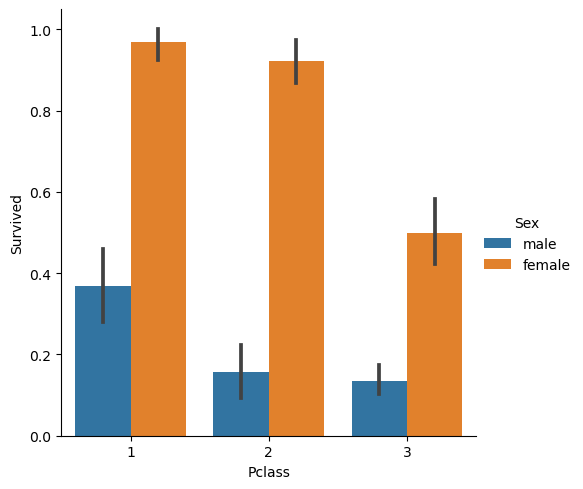

In [77]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=titanic)
g.set_ylabels("survival probability");

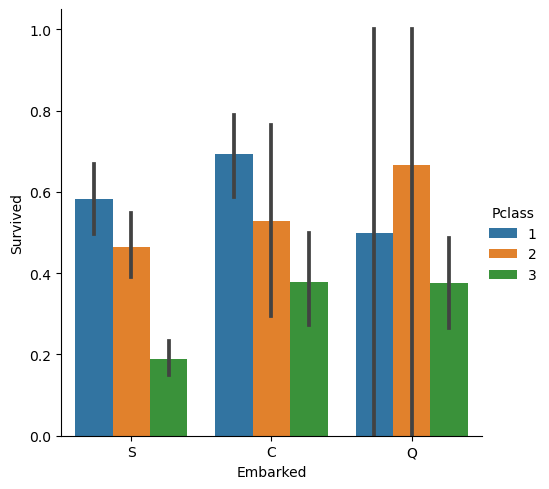

In [78]:
sns.catplot(y="Survived", x="Embarked", hue="Pclass", kind="bar", data=titanic)
g.set_ylabels("survival probability");

Explore other combinations of features with similar plots.

After considering these plots, which variables do you expect to be good predictors of survival?

After these plots, good variables to predict survival are Gender, Age, PClass, Parch, SibSp and Embarked. The highest survival probability is attained by women in 1st class that embarked in Cherbourg.

## Make a predictive model

After this brief exploration of the dataset, let's try to train a model to predict the survival of "new" (i.e. unknown) passengers.

A *decision tree* classifier will be used to complete this task.

To begin with, import the decision tree package (named `tree`) implemented in Scikit Learn (a.k.a. `sklearn`).

In [79]:
import sklearn.tree

Then reload the dataset:

In [80]:
titanic = pd.read_csv("~/shareddata/CSE204/titanic/titanic_train.csv")

### Exercise 8

Based on investigations made in the exploratory analysis, which variables can be ignored (they cannot convey any meaningful information (think IDs...)? Complete the following cell to remove useless features.

In [81]:
# YOUR CODE HERE
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Once you have removed useless variables, remove examples with missing values from the dataset.

In [82]:
# YOUR CODE HERE
titanic=titanic.dropna()
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


Let's finish the dataset cleaning by converting categorical features to numerical ones. This is often required by Machine Learning algorithms' implementations (in particular in `sklearn`) since most os these algorithms rely on matrix calculus / algebra.

In [83]:
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}).astype(int)

/tmp/ipykernel_84/3314984688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
/tmp/ipykernel_84/3314984688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}).astype(int)


The following cell gives an overview of our dataset (only the first lines displayed).

In [84]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Now that the dataset is ready, we split it in two subsets:
- the training set (`X_train` and `Y_train`);
- the testing set (`X_test` and `Y_test`).

`X_xxx` contains example's *features* and `Y_xxx` contains example's *labels*.

In [85]:
X = titanic.drop("Survived", axis=1)  # X cannot contain the label
Y = titanic["Survived"]

X_train = X.iloc[:-10]  # all samples except 10 last ones
Y_train = Y.iloc[:-10]

X_test = X.iloc[-10:]  # 10 last samples
Y_test = Y.iloc[-10:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((702, 7), (702,), (10, 7), (10,))

### Exercise 9

Explain qualitatively why it is necessary to split the dataset in these two subsets (training set - think **past** results of dice rolls - and testing set - think **new** dice rolls).

It is necessary to split the dataset into two to have a training data (with which our model will learn and know how to predict some output) and a test data that our model did not train on (to see if our model will print the right output when we give it a passenger that is not included in the dataset). If we use all the data to train the model then test the model on that same data, it will have a 100% accuracy, which won't mean anything here since it already had access to the actual outputs.

The classifier is instanciated and trained with the following code:

In [86]:
decision_tree = sklearn.tree.DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Note that in `sklearn` most algorithms are implemented as classes.

A particular instance is created, and we use class methods such as `fit`, `transform` or `predict` on appropriate arguments to perform operations.

Then the success rate of predictions is checked on both sets:

In [87]:
decision_tree.score(X_train, Y_train)

0.9857549857549858

In [88]:
decision_tree.score(X_test, Y_test)

0.9

Finally we make some predictions and compare them to the truth:

In [89]:
Y_pred = decision_tree.predict(X_test)

pd.DataFrame(np.array([Y_pred, Y_test]).T, columns=('Predicted', 'Actual'))

,Predicted,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,1
9,0,0


### Plot feature importances (for the trained model)

The following code plot the relative importance of features for the prediction task (for the trained model).

(What "importance" means is beyond the scope of this lab; the interested reader might refer to `sklearn`'s documentation)

In [90]:
imp = pd.DataFrame(decision_tree.feature_importances_,
                   index=X_train.columns,
                   columns=['Importance'])
imp.sort_values(['Importance'], ascending=False)

,Importance
Sex,0.300708
Age,0.271730
Fare,0.194196
Pclass,0.126097
SibSp,0.067357
Embarked,0.020505
Parch,0.019407


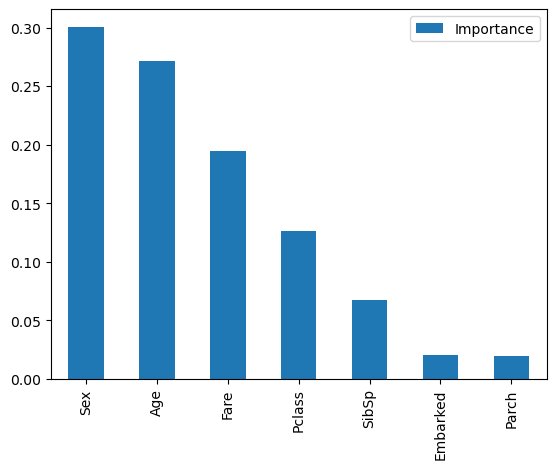

In [91]:
imp.sort_values(['Importance'], ascending=False).plot.bar();

### Exercise 10

Compare this list to the assumptions made during the exploratory analysis.
Have you predicted a similar ranking?

Yes, although I swapped the ranking of SibSp and Parch

### Bonus: display the decision tree

In [92]:
import sys
!{sys.executable} -m pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.3 MB/s eta 0:00:00


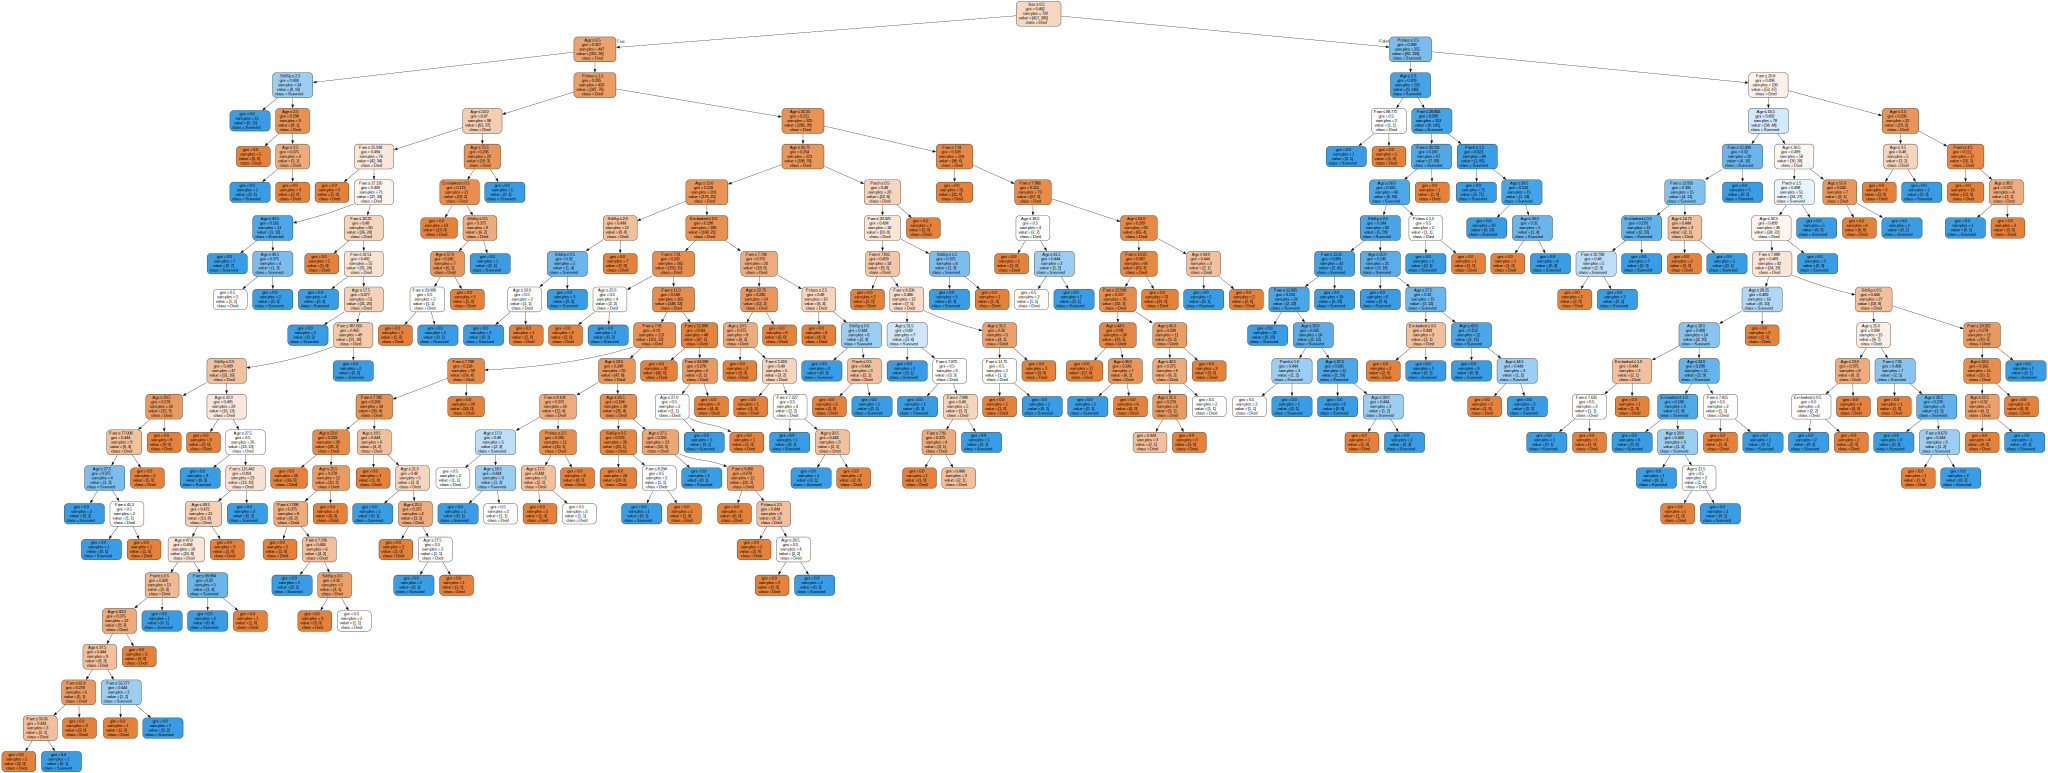

In [93]:
import graphviz
from IPython.display import display

dot_data = sklearn.tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['Died', 'Survived'],
                                filled=True, rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)
display(graph)

# Going further

Here is a good tutorial to complete the lab session: [Understanding and diagnosing your machine-learning models](http://gael-varoquaux.info/interpreting_ml_tuto/) (by Gael Varoquaux)